In [2]:
from imutils import paths
import os

imagePaths = list(paths.list_images("D:\\train\\train"))

for imagePath in imagePaths:
    print(imagePath)
    name = imagePath.split(os.path.sep)[-2]
    print(name)

D:\train\train\Bicycle(1618 images)\000001_00.jpg
Bicycle(1618 images)
D:\train\train\Bicycle(1618 images)\000001_19.jpg
Bicycle(1618 images)
D:\train\train\Bicycle(1618 images)\000004_07.jpg
Bicycle(1618 images)
D:\train\train\Bicycle(1618 images)\000004_15.jpg
Bicycle(1618 images)
D:\train\train\Bicycle(1618 images)\000010_09.jpg
Bicycle(1618 images)
D:\train\train\Bicycle(1618 images)\000012_09.jpg
Bicycle(1618 images)
D:\train\train\Bicycle(1618 images)\000013_05.jpg
Bicycle(1618 images)
D:\train\train\Bicycle(1618 images)\000025_19.jpg
Bicycle(1618 images)
D:\train\train\Bicycle(1618 images)\000026_06.jpg
Bicycle(1618 images)
D:\train\train\Bicycle(1618 images)\000029_05.jpg
Bicycle(1618 images)
D:\train\train\Bicycle(1618 images)\000029_17.jpg
Bicycle(1618 images)
D:\train\train\Bicycle(1618 images)\000031_03.jpg
Bicycle(1618 images)
D:\train\train\Bicycle(1618 images)\000031_09.jpg
Bicycle(1618 images)
D:\train\train\Bicycle(1618 images)\000033_04.jpg
Bicycle(1618 images)
D:\tra

In [3]:
labels = []
data = []

In [4]:
import random
import cv2
import numpy as np

In [ ]:
import random
import cv2
import numpy as np
random.seed(21)
random.shuffle(imagePaths)


for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (64, 64))
    data.append(image)
    label = ""
    name = imagePath.split(os.path.sep)[-2]
    
    if  name == "Bicycle":
        label = np.array([1,0, 0, 0])
    elif name == "Bus":
        label = np.array([0,1, 0, 0])
    elif name == "Car":
        label = np.array([0,0, 1, 0])
    elif name == "Motorcycle":
        label = np.array([0,0, 0, 1])
       
    labels.append(label)

In [10]:
from numpy import save

print(data.shape)

(13520, 64, 64, 3)


In [11]:
save("vehicle_data.npy",data)
save("vehicle_labels.npy",labels)

In [12]:
import random
import cv2
import numpy as np

data = np.load("vehicle_data.npy")
labels = np.load("vehicle_labels.npy")
print("Dataset shape: ")
print(data.shape)

Dataset shape: 
(13520, 64, 64, 3)


In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels  = train_test_split(data,labels, test_size=0.25, random_state=21)

In [6]:
print("Train set shape : ")
print( train_set.shape)

Train set shape : 
(10138, 64, 64, 3)


In [7]:
print("Test set shape : ")
print(test_set.shape)

Test set shape : 
(3380, 64, 64, 3)


In [15]:
from keras.utils import np_utils
from keras.models  import Sequential
from  keras.layers import Dense, Activation, Flatten, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import regularizers

In [21]:

model = Sequential()
model.add(Conv2D(64,(3,3), padding="same", input_shape = (64,64,3), activation="relu"))
model.add(Conv2D(128,(3,3), padding="same", activation="relu"))
model.add(Conv2D(64,(3,3), padding="same", activation="relu",kernel_regularizer=regularizers.l2()))
# model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
# model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
# model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
# model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
# model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
# model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
# model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
# model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
# model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())

#model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(750, activation='relu'))
model.add(Dense(750, activation='relu'))
#model.add(Dense(750, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(600, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.001), metrics = ["accuracy"])
H= model.fit(train_set,train_labels, epochs=30, validation_data=(test_set, test_labels))

Epoch 1/30
317/317 [==============================] - 942s 3s/step - loss: 2.1531 - accuracy: 0.4834 - val_loss: 1.8958 - val_accuracy: 0.5781
Epoch 2/30
317/317 [==============================] - 660s 2s/step - loss: 1.8776 - accuracy: 0.5764 - val_loss: 1.7257 - val_accuracy: 0.6420
Epoch 3/30
317/317 [==============================] - 609s 2s/step - loss: 1.7270 - accuracy: 0.6350 - val_loss: 1.5920 - val_accuracy: 0.6923
Epoch 4/30
317/317 [==============================] - 648s 2s/step - loss: 1.6076 - accuracy: 0.6823 - val_loss: 1.5171 - val_accuracy: 0.7263
Epoch 5/30
317/317 [==============================] - 622s 2s/step - loss: 1.5236 - accuracy: 0.7134 - val_loss: 1.5414 - val_accuracy: 0.6985
Epoch 6/30
317/317 [==============================] - 619s 2s/step - loss: 1.4546 - accuracy: 0.7390 - val_loss: 1.4916 - val_accuracy: 0.7198
Epoch 7/30
317/317 [==============================] - 619s 2s/step - loss: 1.4033 - accuracy: 0.7540 - val_loss: 1.4618 - val_accuracy: 0.7293

In [25]:
#np.save('my_history.npy',H.history)

In [3]:
h=np.load('my_history.npy',allow_pickle='TRUE').item()

In [22]:
import h5py
#model.save("test9619.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dropout (Dropout)           (None, 28224)             0         
                                                        

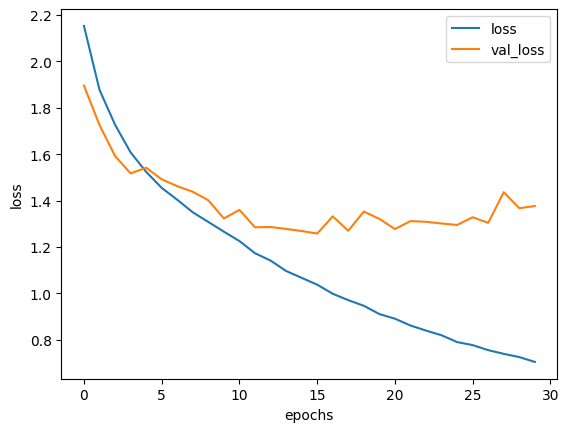

In [5]:
#test0004 96%
from matplotlib import pyplot as plt
plt.plot(h["loss"])
plt.plot(h["val_loss"])

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['loss','val_loss'],loc = 'upper right')

plt.show()

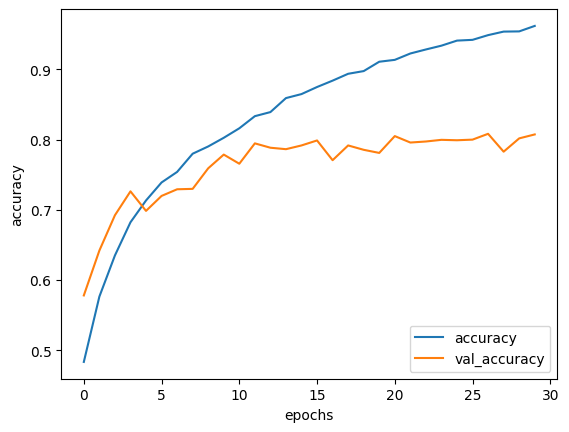

In [6]:
#test0004

from matplotlib import pyplot as plt
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(['accuracy','val_accuracy'],loc = 'lower right')
plt.show()

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model("test9619.h5")

In [3]:
predicted = []

In [9]:
pre = model.predict(test_set)
print(pre)
predicted = np.argmax(pre,axis=1)
print(predicted)

317/317 [==============================] - 150s 466ms/step
[[7.79976691e-12 1.00227868e-10 1.00000000e+00 4.87880625e-10]
 [9.98003542e-01 6.30001580e-07 2.37479453e-05 1.97204738e-03]
 [2.08604615e-02 4.30685887e-03 9.53384399e-01 2.14483403e-02]
 ...
 [1.86947382e-05 1.12171612e-10 3.72968748e-06 9.99977589e-01]
 [6.27658814e-02 5.30700390e-06 9.36442733e-01 7.86057848e-04]
 [2.14739906e-04 1.06320726e-07 4.54588553e-05 9.99739707e-01]]
[2 0 2 ... 3 2 3]


In [10]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:

actual = np.argmax(test_labels,axis=1)
print(actual)

[2 0 2 ... 3 2 3]


In [12]:
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[1184    1    7   17]
 [   1 1598    5    0]
 [  21   42 5019   13]
 [  25    3    8 2194]]


In [13]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[0,1,2,3])
print("Outcome values : \n", tp, fn, fp, tn)

Outcome values : 
 [1184    1    7   17] [   1 1598    5    0] [  21   42 5019   13] [  25    3    8 2194]


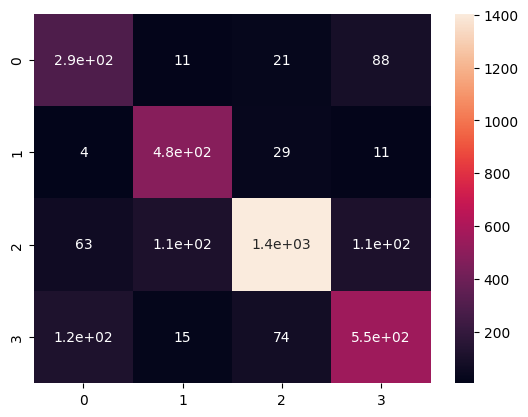

In [22]:
import seaborn as sn
import pandas as pd 
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(matrix, range(4), range(4))
sn.heatmap(df_cm, annot=True)
plt.show()

In [14]:
report = classification_report(actual,predicted,labels=[0,1,2,3])
print("Classification Report : \n", report)  #test classification report

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1209
           1       0.97      1.00      0.98      1604
           2       1.00      0.99      0.99      5095
           3       0.99      0.98      0.99      2230

    accuracy                           0.99     10138
   macro avg       0.98      0.99      0.98     10138
weighted avg       0.99      0.99      0.99     10138



In [ ]:
Class = ['Bicycle','Bus','Car','Motorcycle']
Predicted_value = [489,477,430,446]
Actual_value = [510, 484,520,486]